In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
# Carregando os dados

dataset = pd.read_csv('risco.csv')
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [3]:
# shape[0] representa o número de linas e shape[1] representa o número de colunas
# Use-se f' antes da string para usar variáveis e chaves para chamar o arquivo e a função.


print(f'O dataset contém {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.')

O dataset contém 150 linhas e 6 colunas.


In [4]:
# Mostra o número de linhas, a média, o desvião padrão, valores de mín e max e os quartis.

dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# arquivo['nome da coluna'].value_counts() para contar quantos de cada tipo tem dentro da coluna

dataset['Risco'].value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

In [6]:
# Mostra quantos valores missing existe em cada coluna.

dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [7]:
# Função que exclui uma coluna da tabela

dataset = dataset.drop(columns="id_cliente")
dataset.head(3)

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto


In [8]:
# Comando que mostra (número de linhas, número de colunas)

dataset.shape

(150, 5)

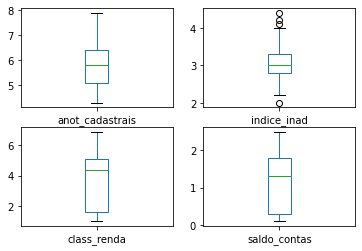

In [9]:
# Plota os gráficos 'box' de cada variável mostrando limite superior, inferior, mediana, quartil de 25 e 75%
# assim como pontos outliers

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

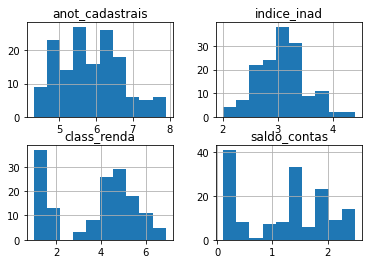

In [10]:
# Plota o histograma de cada variável

dataset.hist()
pyplot.show()

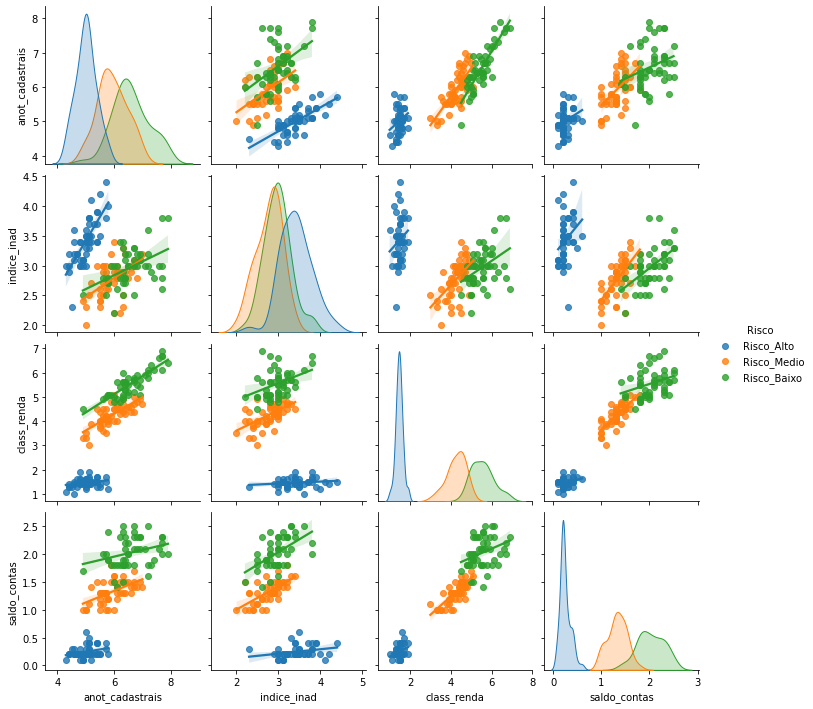

In [11]:
# Plota a distribuição dos dados em relação a duas variáveis, paramêmtro hue para dividir os pontos por tipos

sns.pairplot(dataset, hue='Risco', kind='reg')

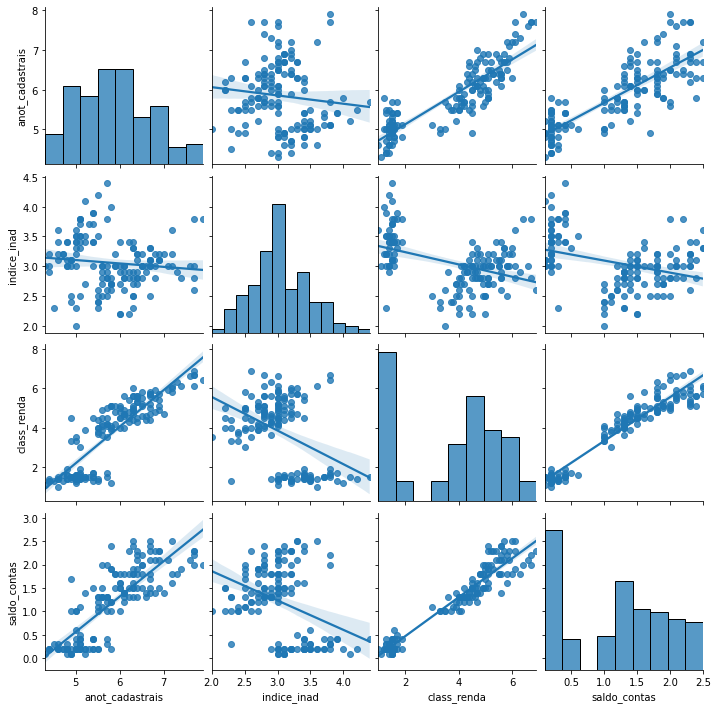

In [12]:
# Plota a distribuição dos dados em relação a duas variáveis

sns.pairplot(dataset, kind='reg')

In [13]:
# Divide as colunas entre variáveis de entrada e variável que queremos encontrar

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [14]:
# Print das primeiras colunas dos dados x e y

print(x[:3],'\n')
print(y[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 

['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [15]:
# Importando a biblioteca de separação de treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 7)

In [16]:
print("Dados de Treino :\n----------------\n")
print("x = \n", x_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("x = \n",x_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

x = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

x = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [17]:
# Dimensão dos dados de treino e teste

print(f"Shape dos dados de treino é {x_train.shape}")
print(f"Shape dos dados de teste é {x_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


In [18]:
# Função do ScyKit learn que padroniza os dados (retira os outliers)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", x_train[:5])
print("-------------------------")
print("\nX_test :\n", x_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


In [19]:
# Criando a máquina preditiva do tipo KNN (K vizinhos mais próximos, onde k é o número de vizinhos que queremos escolher)

from sklearn.neighbors import KNeighborsClassifier as KNC
Maquina_Preditiva = KNC(n_neighbors=10, metric='euclidean') #[1,10,30,50]

In [20]:
# Treinando a máquina preditiva com os dados de treino separados anteriormente

Maquina_Preditiva = Maquina_Preditiva.fit(x_train,y_train)

In [21]:
# Testando a máquina preditiva com os dados de teste

y_pred = Maquina_Preditiva.predict(x_test)

In [22]:
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [23]:
# Para se obter os parâmetros usados na máquina preditiva

Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='euclidean', n_neighbors=10)>

In [24]:
# Importando a biblioteca metrics para usar a função accuracy_score para descobrir a taxa de acerto da máquina preditiva

from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  90.0


In [25]:
# Criamos um dataframe para comparar valores reais com os valores preditos

print("\nReal vs Predito \n----------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
----------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [26]:
# Também do biblioteca metrics, importamos a confusion matrix e o classification report, ambos para avaliar a
# acurácia da máquina preditiva

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  90.0
[[ 7  0  0]
 [ 0  9  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.90      0.82      0.86        11
 Risco_Medio       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [27]:
# Da biblioteca svm importamos o SVC que significa support vector classifier

from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)

In [28]:
# Treinando a máquina preditiva com os dados de treino separados anteriormente

classifier.fit(x_train,y_train)

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [29]:
# Testando a máquina preditiva com os dados de teste

y_pred = classifier.predict(x_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [30]:
# Importando a biblioteca metrics para usar a função accuracy_score para descobrir a taxa de acerto da máquina preditiva

from sklearn.metrics import accuracy_score
print("Acurácia = ", accuracy_score(y_test, y_pred).round(2))

Acurácia =  0.93


In [31]:
# Criamos um dataframe para comparar valores reais com os valores preditos

print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)


Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [32]:
# Também do biblioteca metrics, importamos a confusion matrix e o classification report, ambos para avaliar a
# acurácia da máquina preditiva

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [33]:
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

